# COGS 108 - Rating vs # of Downloads on Google Play Store Apps.

# Overview

The project seeks to see if average rating has any effect on number of downloads between free and paid apps on the Google Play Store. We used a linear regression model to determine if there was an effect. We concluded that while free apps were affected by the average rating on its number of downloads, we cannot conclude this for paid apps.

# Names

- Andrew Huh
- Jonathan Min
- David Youn
- Han Kim
- Justin Lee

<a id='research_question'></a>
# Research Question

Does average rating affect the number of downloads between free and paid apps on the Google Play Store?

<a id='background'></a>

## Background & Prior Work

The Google Play Store is a digital distribution service operated and owned by Google. It is the offical app store for Android devices. Anyone can create and upload an app to Google Play Store, and it tends to be more developer friendly compared to Apple's counterpart, Apple App Store. Applications on the Google Play Store are either free or come with a cost. The Google Play Store also tracks many other different pieces of information like number of downloads and user reviews.

The first reference is an analysis of apps in the Google Play Store in 2018. While they didn't have a research question they wanted to answer, they were able to analyze many different variables for apps in the Play Store. The author looked at data pertaining to advertisments, the different amount of free vs priced apps in each app category, price distribution, and many other detailed information for applications. The author learned that certain app categories were more prevalent than others, such as Health & Fitness apps being more common than Food and Drink apps. They also learned that their dataset had 58% free apps and 42% paid apps. While the reference is not the same as answering a research question like our project, we can look at the graphs and data the author looked at to see if we can find that data within our own dataset. We can also see if any of their analysis can be of any help to our own project.

The second reference is the winning submission of an analysis of the Google Play Store. The author used the same dataset as our project, but looked into the question of using machine learning on the dataset to predict the rating of an app before an after launching on the Play Store. The author concluded that prediction of how well an app will do is beneficial to business values and should be looked into further in the future. This reference can help us know what data to clean for our own question. They went through data cleaning and data visualization. This can be a guide to help us with our own project.

References:
- 1) https://nycdatascience.com/blog/student-works/web-scraping/analysis-of-apps-in-the-google-play-store/
- 2) https://medium.com/the-research-nest/data-science-tutorial-analysis-of-the-google-play-store-dataset-c720330d4903

# Hypothesis


We believe that there is a correlation between average rating and the number of downloads. Both free and priced apps will have a higher number of downloads when there is a higher average rating. We come to this hypothesis due to people looking at average rating to see if they will download an application. When people see a higher average rating then they will be more likely to download the application, thus increaing the number of downloads.

# Dataset(s)

- Dataset Name: Google Play Store Apps 
- Link to the dataset: https://www.kaggle.com/lava18/google-play-store-apps
- Number of observations: 10841 Observations

This dataset contains various information about apps on the Google Play Store that was obtained through the help of Python and Scrapy being ran on a Google Virtual Machine Instance. The dataset includes variables for an  application's rating, number of reviews, size, installs, type (free or paid), price, content rating, genre, last update, current version, and android version.

# Setup

In [1]:
# Import External Libraries
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import patsy
import statsmodels.api as sm

# Makes the plots look nicer
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Data Cleaning

 We need to clean our data into a usable state for our research question. First, we read in the data from our csv file.

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We isolated the columns we need for our analysis. Since we are looking to analyze how rating affects downloads between free and paid apps, we are using the columns: 'App', 'Rating', 'Reviews', 'Installs', 'Type', 'Price'. We also got rid of any rows with null values.

In [3]:
apps = data[['App', 'Rating', 'Reviews', 'Installs', 'Type', 'Price']]
apps = apps.dropna(subset=['Rating', 'Price'])
apps.columns

Index(['App', 'Rating', 'Reviews', 'Installs', 'Type', 'Price'], dtype='object')

We then sorted the values by the number of Installs in descending order.

In [4]:
apps = apps.sort_values(by=['Installs'], ascending = False)
apps.columns

Index(['App', 'Rating', 'Reviews', 'Installs', 'Type', 'Price'], dtype='object')

We found to have a row with misaligned values, so we also got rid of it.

In [5]:
apps = apps.reset_index()
apps = apps.drop([0])
apps.head()

,index,App,Rating,Reviews,Installs,Type,Price
1,431,Viber Messenger,4.3,11334973,"500,000,000+",Free,0
2,347,imo free video calls and chat,4.3,4785892,"500,000,000+",Free,0
3,3476,Google Calendar,4.2,858208,"500,000,000+",Free,0
4,1759,Temple Run 2,4.3,8118937,"500,000,000+",Free,0
5,3473,Dropbox,4.4,1861310,"500,000,000+",Free,0


The dataset created an index column that is not useful, so we will remove it.

In [6]:
apps = apps[['App', 'Rating', 'Reviews', 'Installs', 'Type', 'Price']]
apps.head()

,App,Rating,Reviews,Installs,Type,Price
1,Viber Messenger,4.3,11334973,"500,000,000+",Free,0
2,imo free video calls and chat,4.3,4785892,"500,000,000+",Free,0
3,Google Calendar,4.2,858208,"500,000,000+",Free,0
4,Temple Run 2,4.3,8118937,"500,000,000+",Free,0
5,Dropbox,4.4,1861310,"500,000,000+",Free,0


We then dropped the '$' from the Price column by writing a standardize_price function.

In [7]:
def standardize_price(string):
    string = string.replace('$', '')
    return string

In [8]:
apps['Price'] = apps['Price'].astype(str)
apps['Price'] = apps['Price'].apply(standardize_price)
apps['Price'] = apps['Price'].astype(float)
apps

,App,Rating,Reviews,Installs,Type,Price
1,Viber Messenger,4.3,11334973,"500,000,000+",Free,0.00
2,imo free video calls and chat,4.3,4785892,"500,000,000+",Free,0.00
3,Google Calendar,4.2,858208,"500,000,000+",Free,0.00
4,Temple Run 2,4.3,8118937,"500,000,000+",Free,0.00
5,Dropbox,4.4,1861310,"500,000,000+",Free,0.00
...,...,...,...,...,...,...
9362,The Pursuit of God,4.8,6,"1,000+",Free,0.00
9363,Depths of Betrayal CE (Full),4.3,363,"1,000+",Paid,2.99
9364,KBA-EZ Health Guide,5.0,4,1+,Free,0.00
9365,Mu.F.O.,5.0,2,1+,Paid,0.99


# Data Analysis & Results

For our data analysis, we need to explore if there is any relationship between the average rating and the number of downloads for free and priced apps on Google Play Store.

# EDA
First, we will do EDA to look at the structure, granularity, scope, temporality, and faithfulness of our data.

## Structure

In [9]:
#Look at the first few rows of apps dataset
apps.head()

,App,Rating,Reviews,Installs,Type,Price
1,Viber Messenger,4.3,11334973,"500,000,000+",Free,0.0
2,imo free video calls and chat,4.3,4785892,"500,000,000+",Free,0.0
3,Google Calendar,4.2,858208,"500,000,000+",Free,0.0
4,Temple Run 2,4.3,8118937,"500,000,000+",Free,0.0
5,Dropbox,4.4,1861310,"500,000,000+",Free,0.0


Looking at the first few rows of our `apps` dataset, we see that this is **tabular data** with every oberservation in rows and variables in columns.

In [10]:
# Shape of Data
print(apps.shape)

# Descriptive statistics for quantitative variables
print(apps.dtypes)

(9366, 6)
App          object
Rating      float64
Reviews      object
Installs     object
Type         object
Price       float64
dtype: object


There are 9366 apps in our data. Most of the variables in our dataset are stored as strings except for ating and price, where they are actual numerical values.

## Granularity

In [11]:
# Again, take a look at data
apps.head()

,App,Rating,Reviews,Installs,Type,Price
1,Viber Messenger,4.3,11334973,"500,000,000+",Free,0.0
2,imo free video calls and chat,4.3,4785892,"500,000,000+",Free,0.0
3,Google Calendar,4.2,858208,"500,000,000+",Free,0.0
4,Temple Run 2,4.3,8118937,"500,000,000+",Free,0.0
5,Dropbox,4.4,1861310,"500,000,000+",Free,0.0


Every observation is in a row, while each column represents a variable. Each observation represents a different single individual app. The variables in each observation are the application's name, its rating, the number of reviews it has, a rough estimate of installs, if its free or paid, and the price of the app.

## Scope

In [12]:
# Check if there is any null values in our dataset
apps.isnull().values.any()

False

In [13]:
# Look at descriptive statistics for our dataset
apps.describe()

,Rating,Price
count,9366.000000,9366.000000
mean,4.191757,0.960928
std,0.515219,15.816585
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


The range of ratings are from 1 to 5 while the range of price is from 0 to 400. The mean of the rating is 4.2 while the mean of the price is $0.96. Typically ratings are fairly high based on the mean. We can now look at different distributions of our dataset variables and relationship with one another.

In [14]:
# Checking value counts of Type of Apps
apps.Type.value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

With the value_counts() method we can see that there is a massive amount of Free Apps compared to Paid Apps in our dataset.

Text(0, 0.5, 'Amount of Appearances in Dataset')

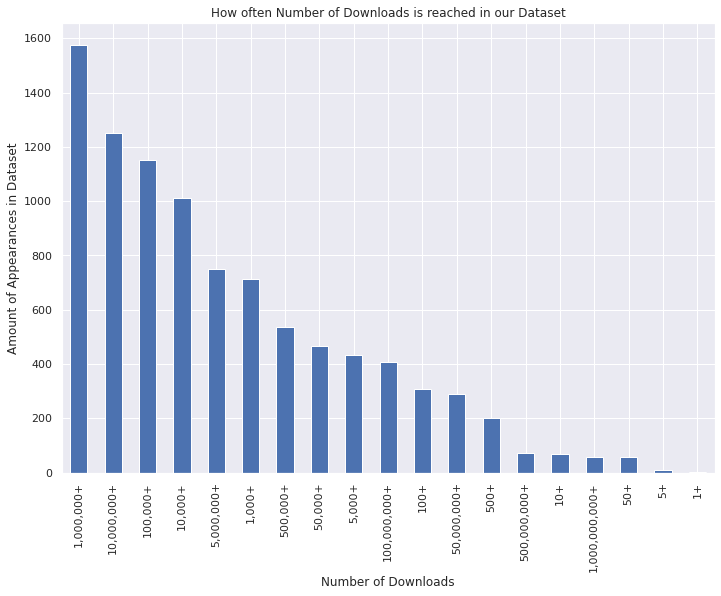

In [15]:
# Create Bar Plot of Installs variable to check distribution
installsBar = apps.Installs.value_counts().plot(kind='bar')
plt.title('How often Number of Downloads is reached in our Dataset')
plt.xlabel('Number of Downloads')
plt.ylabel('Amount of Appearances in Dataset')

As we see in our bar plot. Many of our applications in our dataset are downloaded at least 10,000+. We do not have many applications where our Number of Downloads is 50+ or lower and where it is also 500,000,000+ or higher.

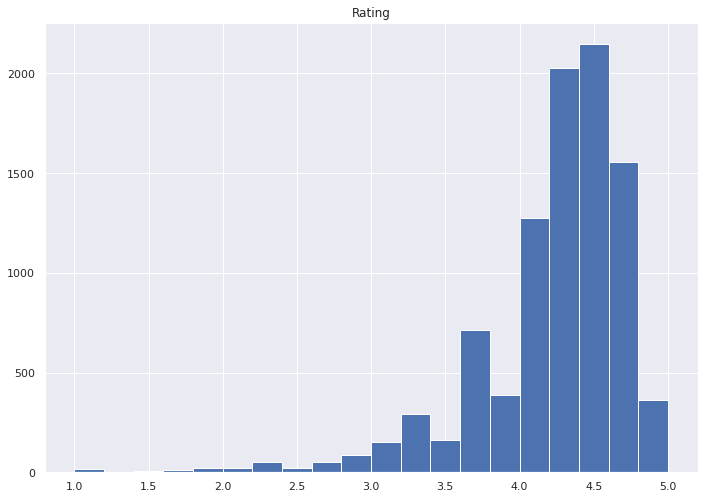

In [16]:
# Histogram of the average user rating throughout our dataset
histRatings = apps.hist(column='Rating', bins=20)

As we can see in our histogram, many of the ratings in our dataset are at least 4.0 or higher.

Lets check some relationships with our variables in our dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae15f8aa90>]],
      dtype=object)

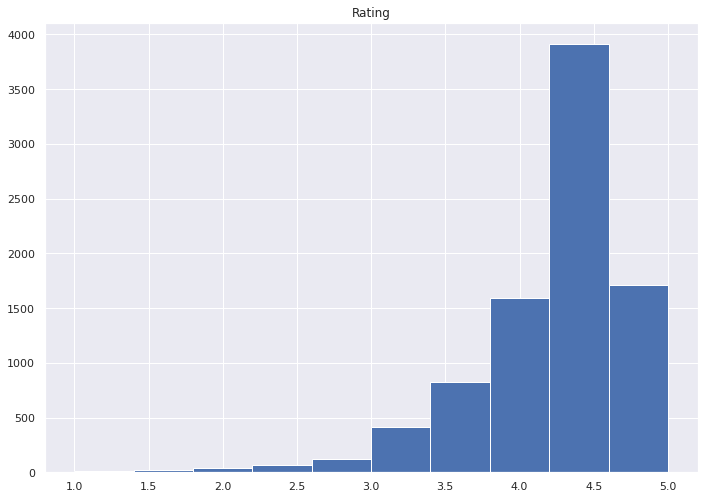

In [17]:
# Check average rating of free apps
apps[apps['Type'] == 'Free'].hist(column='Rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae13d2f250>]],
      dtype=object)

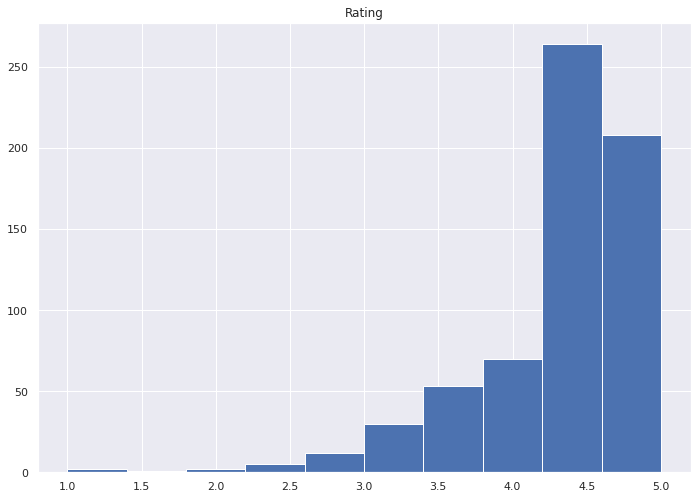

In [18]:
# Check average rating of paid apps
apps[apps['Type'] == 'Paid'].hist(column='Rating')

Our distributions for both free and paid apps look very similar. With a skew toward the higher ratings for both types of apps. The paid apps, however, do have a better distribution of apps with more than a 4.5 rating.

Lets look at Installs separated by Free or Paid Apps.

Text(0, 0.5, 'Amount of Appearances in Dataset')

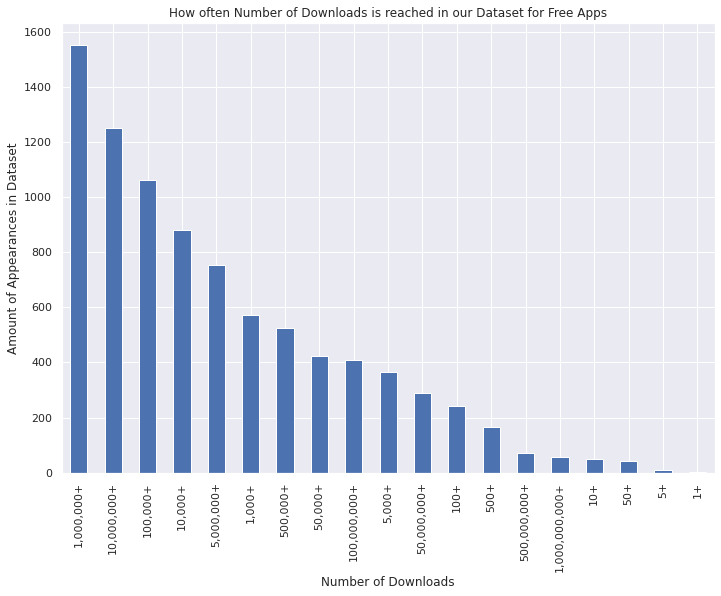

In [19]:
# Create Bar Plot of Installs variable of Free Apps to check distribution
installsFreeBar = apps[apps['Type'] == 'Free'].Installs.value_counts().plot(kind='bar')
plt.title('How often Number of Downloads is reached in our Dataset for Free Apps')
plt.xlabel('Number of Downloads')
plt.ylabel('Amount of Appearances in Dataset')

Text(0, 0.5, 'Amount of Appearances in Dataset')

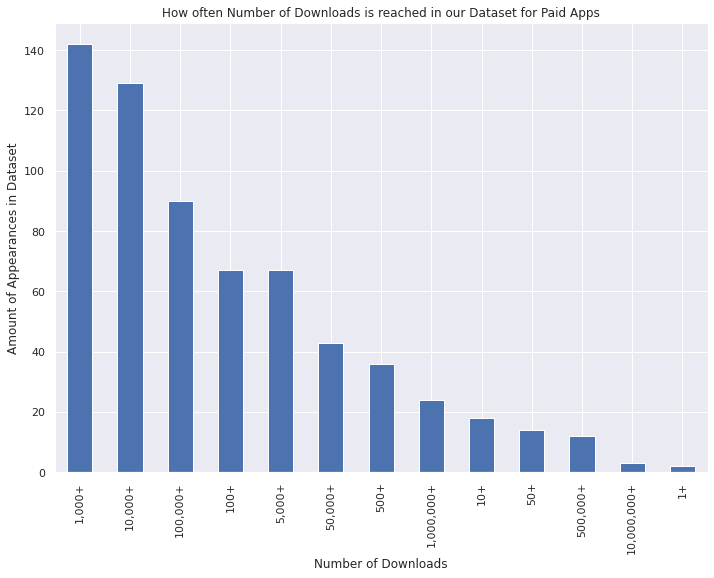

In [20]:
# Create Bar Plot of Installs variable of Paid Apps to check distribution
installsPaidBar = apps[apps['Type'] == 'Paid'].Installs.value_counts().plot(kind='bar')
plt.title('How often Number of Downloads is reached in our Dataset for Paid Apps')
plt.xlabel('Number of Downloads')
plt.ylabel('Amount of Appearances in Dataset')

Since there is more Free apps than Paid apps in our dataset, we can see that the amount of appearances of the Number of Downloads are significantly lower in our Paid apps bar plot. We can also see that there is a smaller amount of Number of Downloads for Paid apps than Free apps. The most common Number of Downloads for Paid apps is 1,000+ while the most common Number of Downloads for Free apps is 1,000,000+. This shows that Free Apps are downloaded more than Paid Apps.

## Temporality

Our cleaned dataset contains no information about when the data was collected or what year/time period they represent. However, our question doesn't deal with time, so it is not needed.

## Faithfulness

The dataset was from an user on kaggle.com They used webscraping to get the dataset from the Google Play Store.

There are no missing values in the dataset based on the **Scope** section, so we look at descriptive statisitcs again to see if values are reasonable. 

In [21]:
# Looking again at the descriptive statistics
apps.describe()

,Rating,Price
count,9366.000000,9366.000000
mean,4.191757,0.960928
std,0.515219,15.816585
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


Using the describe method, we see descriptive statistics for the index rating and price. Index looks fine. And the Rating variable also looks fine, with a minimum of 1 and a maximum of 5. However, the price look suspicious, with a maximum of 400. Using a scatterplot we get the following:

Text(0.5, 1.0, 'Price of Apps vs # of Installs')

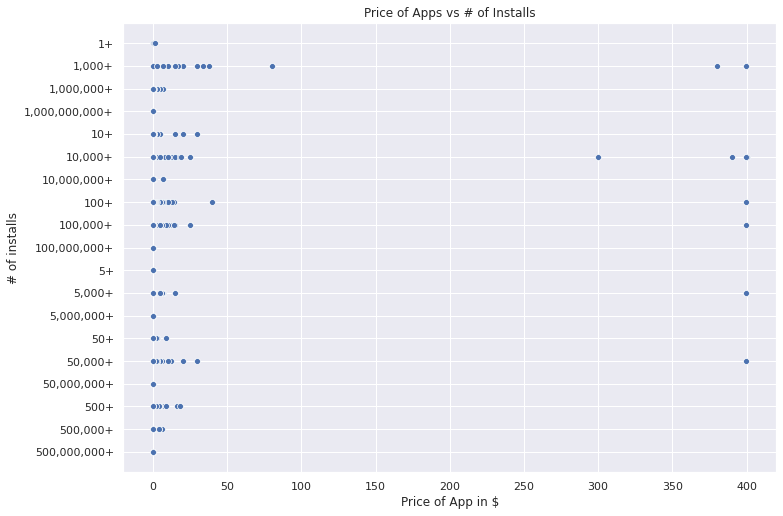

In [22]:
ax_s = sns.scatterplot(x = apps['Price'], y = apps['Installs'])
ax_s.set_ylabel('# of installs')
ax_s.set_xlabel('Price of App in $')
ax_s.set_title('Price of Apps vs # of Installs')

Looking at this graph, the few apps that seem to be outliers in terms of price, while a majority of the apps seem to fit in under the 100 dollar range. In contrast the outliers seem to be greater than or equal to the 300 dollar range.

In [23]:
positiveOutlier = apps.loc[(apps['Price'] >= 250)]
positiveOutlier

,App,Rating,Reviews,Installs,Type,Price
1413,I Am Rich Premium,4.1,1867,"50,000+",Paid,399.99
2416,I am Rich,4.3,180,"5,000+",Paid,399.99
2418,I Am Rich Pro,4.4,201,"5,000+",Paid,399.99
2432,I am rich(premium),3.5,472,"5,000+",Paid,399.99
3247,I am rich,3.8,3547,"100,000+",Paid,399.99
4579,most expensive app (H),4.3,6,100+,Paid,399.99
6728,💎 I'm rich,3.8,718,"10,000+",Paid,399.99
6729,I'm Rich - Trump Edition,3.6,275,"10,000+",Paid,400.00
6870,I Am Rich,3.6,217,"10,000+",Paid,389.99
6915,I am rich VIP,3.8,411,"10,000+",Paid,299.99


We see that there are paid apps that are very expensive. However, the apps and their names show that these apps are like status symbols instead of useful apps. I believe we can keep these outliers in our dataset. We are seeing if the average rating that affects the number of downloads, not the price that affects the number of downloads.

While the data was through web scraping by an user from kaggle, the dataset does seem faithful. The values seem believable with the outliers being outliers due to actually being apps on the Google Play Store.

# Analysis

We are now done with EDA and can now continue to the actual analysis of our dataset.

We will set up our dataset to help us answer our question a little bit easier

In [24]:
# Separate Dataset into Free vs Paid dataset for our question
free_apps = apps.loc[apps['Type'] == 'Free']
free_apps = free_apps.astype({'Reviews' : 'int'})
paid_apps = apps.loc[apps['Type'] == 'Paid']
paid_apps = paid_apps.astype({'Reviews' : 'int'})
print(free_apps.shape)
print(paid_apps.shape)

(8719, 6)
(647, 6)


We should also change the Installs variable in our dataset into an actual int instead of strings.

In [25]:
# This helps the Installs variable
def standardize_installs(string):
    string = string.lower()
    string = string.strip()
    
    string = string.replace('+','')
    string = string.replace(',','')
    
    string = string.strip()
    
    if string.isnumeric():
        return int(string)
    return np.nan

In [26]:
# Apply the function to our datasets.
free_apps['Installs'] = free_apps['Installs'].apply(standardize_installs)
paid_apps['Installs'] = paid_apps['Installs'].apply(standardize_installs)

## Taking a look at Free Apps

We will begin our analysis on the free apps portion of our dataset.

In [27]:
# Look at the first few free_apps data
free_apps.head()

,App,Rating,Reviews,Installs,Type,Price
1,Viber Messenger,4.3,11334973,500000000,Free,0.0
2,imo free video calls and chat,4.3,4785892,500000000,Free,0.0
3,Google Calendar,4.2,858208,500000000,Free,0.0
4,Temple Run 2,4.3,8118937,500000000,Free,0.0
5,Dropbox,4.4,1861310,500000000,Free,0.0


In [28]:
# Look at some statistics
print("Free apps max review: " + str(free_apps['Reviews'].max()) + "\nFree apps min review: " + str(free_apps['Reviews'].min()))
print("Free apps max rating: " + str(free_apps['Rating'].max()) + "\nFree apps min rating: " + str(free_apps['Rating'].min()))

Free apps max review: 78158306
Free apps min review: 1
Free apps max rating: 5.0
Free apps min rating: 1.0


The max amount of reviews for the free apps is 78,158,306 and the min amount of reviews is 1. There is an app that got a 5.0 rating and an app that got a 1.0.

Text(0.5, 1.0, 'Reviews (10 Millions/1E7) vs Ratings for free apps')

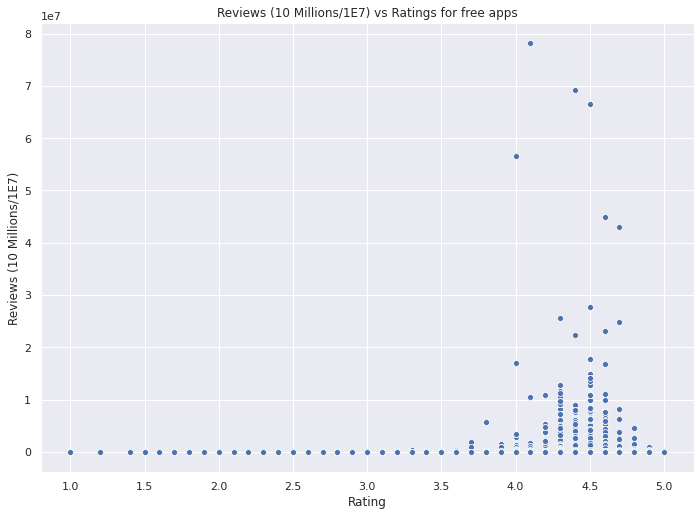

In [29]:
# Scatterplot of ratings vs reviews for free apps
ax_f = sns.scatterplot(y='Reviews', x='Rating', data=free_apps)
ax_f.set_ylabel('Reviews (10 Millions/1E7)')
ax_f.set_title('Reviews (10 Millions/1E7) vs Ratings for free apps')

The graph shows that free apps with higher ratings, approximately neighboring around 4.4 or 4.5, have more reviews than the free apps with lower ratings, lower than approximately 3.5.

Text(0.5, 1.0, 'Reviews (Billions/1E9) vs Ratings for free apps')

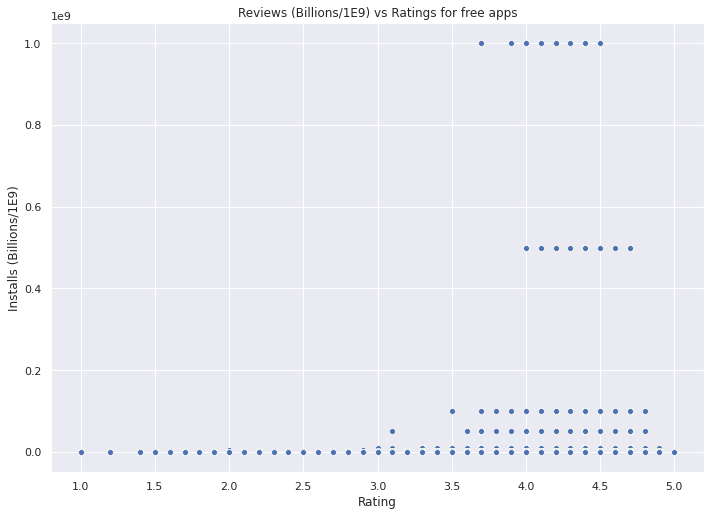

In [30]:
# Scatterplot of ratings vs Installs for free apps
ax_f = sns.scatterplot(y='Installs', x='Rating', data=free_apps)
ax_f.set_ylabel('Installs (Billions/1E9)')
ax_f.set_title('Reviews (Billions/1E9) vs Ratings for free apps')

For free apps, it seems like rating does affect the number of installs an app gets. As the graph above illustrates, the higher the rating of the app is, the higher the number of installs the app has. The number of installs does seem to peek around the rating of between 3.8 and 4.7. This may be because not a lot of apps have a perfect rating of 5 stars.

## Taking a look at Paid Apps

We will now look the paid apps portion of our dataset.

In [31]:
# Look at the first few paid_apps data
paid_apps.head()

,App,Rating,Reviews,Installs,Type,Price
183,NBA JAM by EA SPORTS™,4.3,56444,500000,Paid,4.99
209,Weather Live,4.5,76593,500000,Paid,5.99
287,CamScanner (License),4.4,26358,500000,Paid,1.99
304,ES File Explorer/Manager PRO,4.7,81614,500000,Paid,2.99
351,Assassin's Creed Identity,3.7,42529,500000,Paid,1.99


In [32]:
# Look at some statistics
print("Paid apps max review: " + str(paid_apps['Reviews'].max()) + "\nPaid apps min review: " + str(paid_apps['Reviews'].min()))
print("Paid apps max rating: " + str(paid_apps['Rating'].max()) + "\nPaid apps min rating: " + str(paid_apps['Rating'].min()))

Paid apps max review: 2376564
Paid apps min review: 1
Paid apps max rating: 5.0
Paid apps min rating: 1.0


The max amount of reviews for the paid apps is 2,376,564 and the min amount of reviews is 1. There is an app that got a 5.0 rating and an app that got a 1.0.

Text(0.5, 1.0, 'Reviews (Millions/1E6) vs Ratings for paid apps')

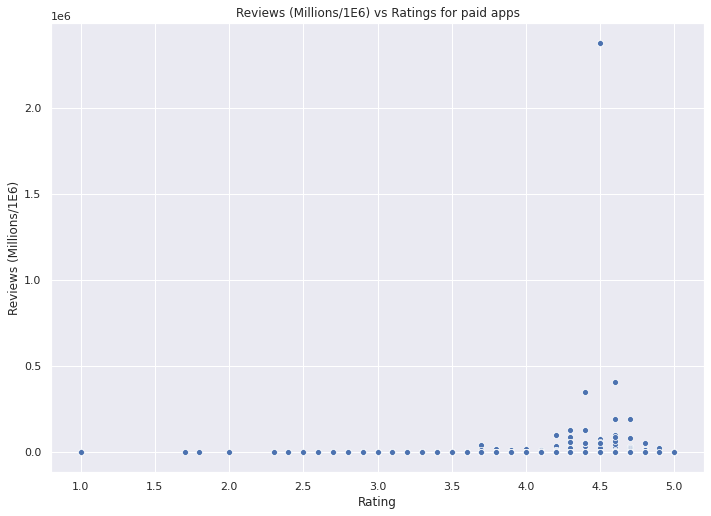

In [33]:
# Scatterplot of ratings vs reviews for paid apps
ax_p = sns.scatterplot(y='Reviews', x='Rating', data=paid_apps)
ax_p.set_ylabel('Reviews (Millions/1E6)')
ax_p.set_title('Reviews (Millions/1E6) vs Ratings for paid apps')

The graph shows that paid apps with higher ratings, approximately neighboring around 4.5, have more reviews than the paid apps with lower ratings, lower than approximately 4.3

Text(0.5, 1.0, 'Reviews (10 Millions/1E7) vs Ratings for paid apps')

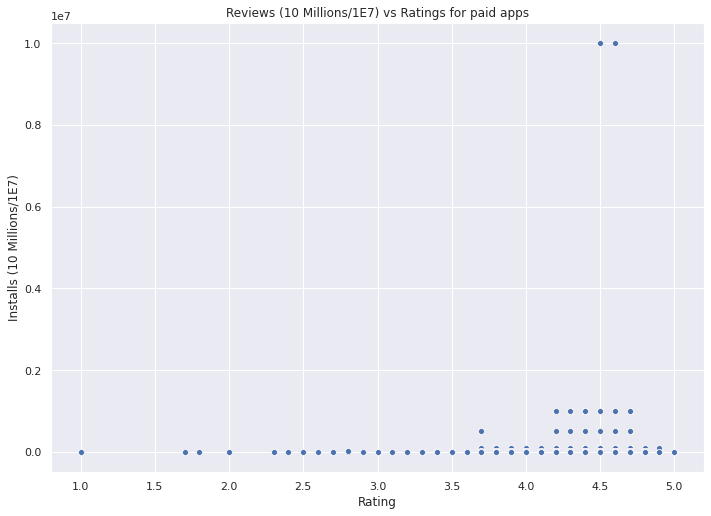

In [34]:
# Scatterplot of ratings vs Installs for paid apps
ax_f = sns.scatterplot(y='Installs', x='Rating', data=paid_apps)
ax_f.set_ylabel('Installs (10 Millions/1E7)')
ax_f.set_title('Reviews (10 Millions/1E7) vs Ratings for paid apps')

For paid apps, it seems like rating also affects the number of installs an app gets. As the graph above illustrates, the higher the rating of the app is, the higher the number of installs the app has. For paid apps, the number of installs seem to peek around the rating of between 4.4 and 4.7.

## Regression Analysis

Lets carry out regression analysis on our two types of apps and their installs.

In [35]:
outcomef, predictorsf = patsy.dmatrices('Installs ~ Rating', free_apps)
modf = sm.OLS(outcomef, predictorsf)
resf = modf.fit()
print(resf.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     27.19
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.89e-07
Time:                        06:42:40   Log-Likelihood:            -1.7247e+05
No. Observations:                8719   AIC:                         3.449e+05
Df Residuals:                    8717   BIC:                         3.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.381e+07   8.31e+06     -2.864      0.0

In [36]:
outcomep, predictorsp = patsy.dmatrices('Installs ~ Rating', paid_apps)
modp = sm.OLS(outcomep, predictorsp)
resp = modp.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.255
Date:                Tue, 16 Mar 2021   Prob (F-statistic):              0.134
Time:                        06:42:40   Log-Likelihood:                -9627.6
No. Observations:                 647   AIC:                         1.926e+04
Df Residuals:                     645   BIC:                         1.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.109e+05   2.17e+05     -0.971      0.3

Using regression analysis, we get the coefficient of 1.028e+07 and 7.585e+04 for Free and Paid apps respectively. So for a 1 unit increase in rating for Free and Paid apps, we will see an increase of 10,280,000 and 75,850 installs respectively for each type of app. Interstingly however, we see that the p-value for our Free Apps regression model is 0 while the p-value for our Paid Apps regression model is 0.134. If we use the 0.05 p-value statistics test, we can see the Free Apps regression model is statisitcally significant while the Paid Apps regression model is not statistically significant. This means that we can determine that the rating does have an effect on installs on our Free Apps model while we cannot determine that the rating has an effect on installs on our Paid Apps model. 

# Ethics & Privacy

In terms of privacy issues that might exist, there is none. This data set is about the applications on the Google Play Store, about their attributes, which are all public information. The author of the dataset used web scraping to get the information straight from the Google Play Store, information anyone can look at right now. None of the information that exists in the data set seem to be gotten through unethical means or through invasion of privacy. If one desires to use this data set to see how they can make their own app successful, they are free to do so. For other ethical issues, our question is based off the dataset and should not have any ethical ramifications if answered; we just want to see the relationship in rating and number of downloads in applications. We also believe our analysis and conclusion should not have ethical problems due to us looking at the rating and number of downloads of free and priced applications. We do not believe any of these variables will result in misuse from companies and other individuals; rather, the only conclusion other people can get from this is the effect rating has on downloads of an application.

One bias that could exist though is the choice of apps on the Google Play Store. If the data set doesn't contain every single app on the play store, then there could exist bias on which apps were chosen to be put into the data set if the data wasn't collected randomly or in a unbiased way. The dataset creator has only put a certain amount of applications from the Google Play Store into the dataset and not everything, which can result in some bias; however, we believe that our conclusion is still true for any random assortment of applications from the app store. We will still put a disclaimer in our conclusion that this did not include every application on the Google Play Store.

# Conclusion & Discussion

In the beginning of the project we asked if the average rating affects number of downloads in either free or paid apps. We had a dataset that included number of installs and average rating for many different free or paid apps. We used regression analysis to determine the answer to our question. We can conclude that the average rating does affect our number of downloads with our free apps of our dataset; however, we cannot conclude that the average rating has an effect on the number of downloads with our paid apps of our dataset. This is due to getting a p-value of 0.134 which is greater than the p-value test value of 0.05. For our free apps, a higher rating will result in higher number of downloads.

Some limitations in our project that might have affected results is the limited number of paid apps in our data set; there were more than 8000 free apps in our dataset, but there were only about 600 paid apps in our dataset. This could have resulted in us not be able to conclude that paid apps were affected by rating the same way free apps were. Another limitation that arose was how the dataset did not include every app on the Google Play Store, which was a result of the author of the dataset. Other limitations might have included how apps might incentivize for ratings from users, which might not be an honest rating from the user.

The impact of this work on society is that it might influence businesses or creators of applications to start thinking about creating a more positive application for users. If it is more positive, then the users are more likely to rate it higher. Based on our conclusion for free apps, the higher a rating, then there will be more installs. This will hopefull impact society to create more competitive applications in order to get a better rating compared to other applications, thus making the market of applications on the Google Play Store to be filled with quality applications for its users.

# Team Contributions

Andrew Huh: Hypothesis, Data Cleaning Section, Write Script for Video, Conclusion

Jonathan Min: EDA and Data Analysis Section, Write Script for Video, Lines For Video, Conclusion

David Youn: Research Question and Dataset, Data Cleaning Section, Write Script for Video, Lines For Video, Conclusion

Han Kim: Ethics and Privacy, EDA and Data Analysis Section, Write Script for Video, Conclusion

Justin Lee: Overview, Background, EDA and Data Analysis Section. Write Script for Video, Conclusion